@author: Savan Agrawal
@file: compare-st.ipynb
@version: 0.1

# Comparison of RL Algorithms using Stable-Baselines3

In [1]:
import gymnasium as gym
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import wget
import numpy as np

### Imports for plotting styles

In [2]:
wget.download('https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle', out='/tmp')
wget.download('https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle', out='/tmp')

'/tmp/rose-pine (1).mplstyle'

In [3]:
mpl.style.use('/tmp/rose-pine-dawn.mplstyle')
# mpl.style.use('/tmp/rose-pine.mplstyle')

## Training Gymnasium MuJoCo Ant-v4 with Five Different RL Algorithms

#### RL Algorithms - A2C, DDPG, PPO, SAC, and TD3

Training for 10 Million timesteps. Calculating Mean Reward and Standard Deviation for each RL Algorithm which will be further used for analysing the models

In [24]:
# Define the environment
env = gym.make('Ant-v4')
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run

# Define the RL algorithms
algos = {
    'A2C': A2C('MlpPolicy', env, verbose=1),
    'DDPG': DDPG('MlpPolicy', env, verbose=1),
    'PPO': PPO('MlpPolicy', env, verbose=1),
    'SAC': SAC('MlpPolicy', env, verbose=1),
    'TD3': TD3('MlpPolicy', env, verbose=1)
}

# Train the algorithms and evaluate their performance
# rewards = {}
# for name, algo in algos.items():
#     print(f'Training {name}...')
#     algo.learn(total_timesteps=100000)
    
#     print(f'Evaluating {name}...')
#     mean_reward, std_reward = evaluate_policy(algo, env, n_eval_episodes=10)
#     rewards[name] = (mean_reward, std_reward)

Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Training A2C...
------------------------------------
| time/                 |          |
|    fps                | 1594     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -11.4    |
|    explained_variance | 0.343    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -27.2    |
|    std                | 1        |
|    value_loss         | 7.5      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1762     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -11.3    |
|    explained_variance | -1.64    |
|    learni

/Users/savan/.pyenv/versions/3.11.4/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Training DDPG...
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 420      |
|    time_elapsed    | 7        |
|    total_timesteps | 3086     |
| train/             |          |
|    actor_loss      | -16.4    |
|    critic_loss     | 0.0805   |
|    learning_rate   | 0.001    |
|    n_updates       | 2000     |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 335      |
|    time_elapsed    | 21       |
|    total_timesteps | 7086     |
| train/             |          |
|    actor_loss      | -6.44    |
|    critic_loss     | 0.0576   |
|    learning_rate   | 0.001    |
|    n_updates       | 6000     |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 12       |
|    fps             | 319      |
|    time_elapsed    | 34      

## Saving the Rewards Dictionary 
Since the models are trained for much longer period of time, we are saving the values in .npy for future use.

In [53]:
# np.save('rewards.npy', rewards)

In [4]:
rewards = np.load('rewards.npy', allow_pickle=True)
rewards = rewards.tolist()

## Plotting the Results

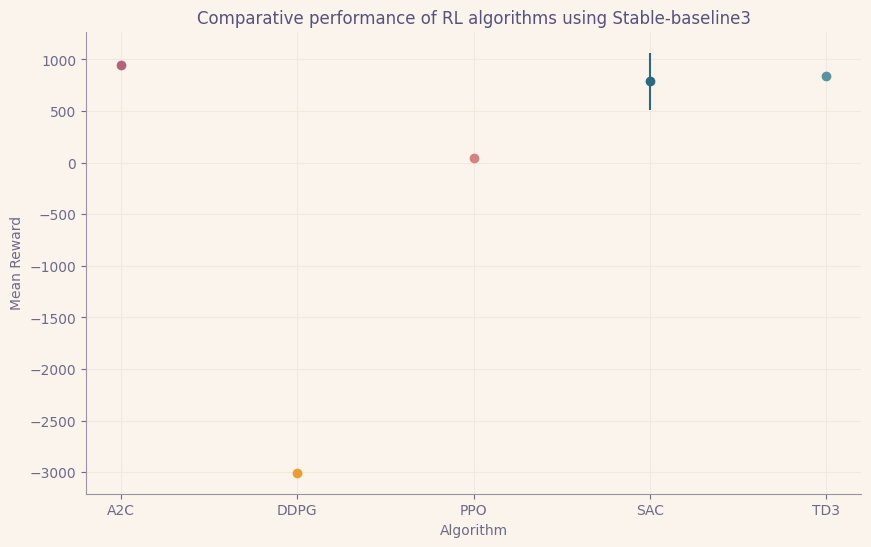

In [5]:
# Plot the results
plt.figure(figsize=(10, 6))
for name, (mean_reward, std_reward) in rewards.items():
    plt.errorbar(name, mean_reward, yerr=std_reward, fmt='o')

plt.title('Comparative performance of RL algorithms using Stable-baseline3')
plt.xlabel('Algorithm')
plt.ylabel('Mean Reward')
plt.grid(True)
plt.savefig('rl_algorithms_performance_dark.png', dpi=300)
plt.show()